## **Module 5 End Assignment - Diabetes Progression Modeling**

Objective:

To model the progression of diabetes using the available independent
variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.

Dataset:

Diabetes dataset available in the sklearn library.

1. Loading and Preprocessing

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [91]:
#to load the dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

#to convert to DataFrame for EDA
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [92]:
#to check for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


No missing values found.

In [93]:
#for feature normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Features are normalized using StandardScaler to ensure all inputs are on a similar scale.
Normalization improves ANN convergence, stability and model accuracy.

2. Exploratory Data Analysis (EDA)

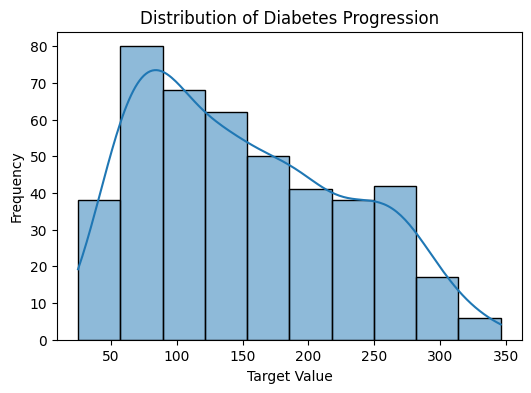

In [94]:
#to plot target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(df['target'], kde=True)
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

Histograms indicate that most input features are approximately normally distributed, while the target variable exhibits a right-skewed distribution, reflecting variability in diabetes progression among patients.

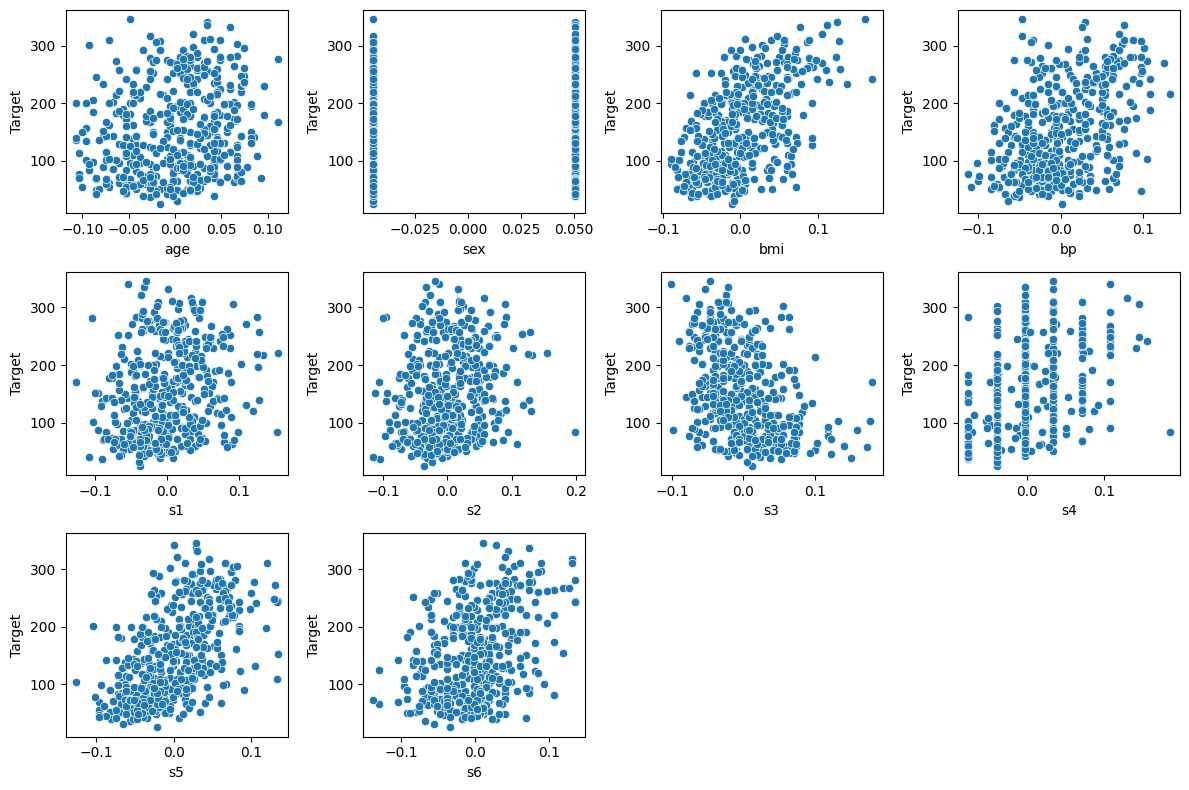

In [95]:
#feature variables vs target variable relationship
plt.figure(figsize=(12,8))
for i, col in enumerate(diabetes.feature_names):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df[col], y=df['target'])
    plt.xlabel(col)
    plt.ylabel("Target")
plt.tight_layout()
plt.show()

BMI shows a strong positive relationship with diabetes progression, indicating that higher body mass index is closely associated with increased disease severity.

Blood pressure (bp) also demonstrates a moderate positive correlation with the target variable, suggesting its significant role in diabetes progression.

Serum measurements (s5 and s6) exhibit noticeable positive trends, implying that lipid-related factors contribute meaningfully to disease progression.

Features such as age, sex, s1, s2, s3, and s4 show weak or no clear linear relationship with the target, indicating that their influence may be indirect or non-linear.

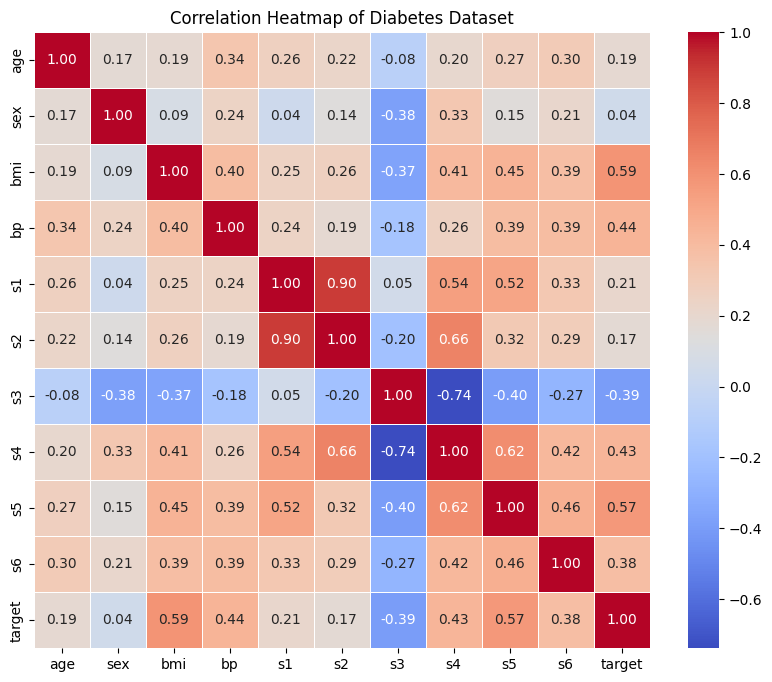

In [96]:
#to plot heatmap
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()


The heatmap shows that diabetes progression is most strongly and positively correlated with BMI and s5, moderately correlated with blood pressure and s4, while most other features have weak or negative correlations, indicating that diabetes progression is influenced by a few key factors and complex non-linear interactions among variables.

3. Building the ANN Model

In [97]:
#train–test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [98]:
#to build the ANN model
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear')
])

baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

baseline_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

4. Training the ANN Model

In [99]:
#to train the ANN model
history_baseline = baseline_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 30912.6621 - val_loss: 22356.9414
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33332.3320 - val_loss: 22225.1699
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30338.3887 - val_loss: 22089.2109
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31867.0176 - val_loss: 21935.9961
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32406.7109 - val_loss: 21766.3594
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28890.6074 - val_loss: 21572.7930
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29914.2578 - val_loss: 21354.2598
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30040.8008 - val_loss: 21114.6094
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29303.0430 - val_loss: 20836.3711
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30373.2051 - val_loss: 20529.8672
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26728.91

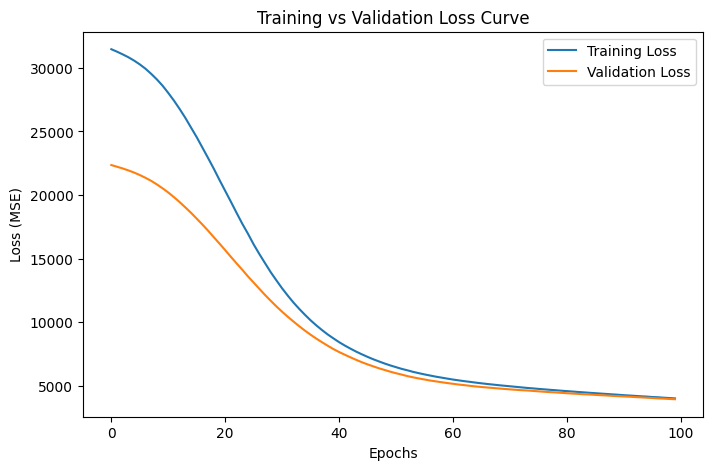

In [100]:
#to plot training loss vs validation loss curve
plt.figure(figsize=(8, 5))
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.show()

5. Evaluating the Model

In [101]:
y_pred_baseline = baseline_model.predict(X_test)

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline Model Performance:")
print("MSE:", mse_baseline)
print("R2 Score:", r2_baseline)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Baseline Model Performance:
MSE: 4440.547897714236
R2 Score: 0.161868495186549


The baseline ANN shows moderate performance with an R² score of 0.16, indicating partial learning of diabetes progression patterns and scope for further optimization.

6. Improving the Model

Model Enhancements

To improve the performance of the baseline ANN model, the following changes were made:

Increased the number of neurons in the hidden layer to help the model learn more complex patterns

Added an extra hidden layer to better capture non-linear relationships in the data

Adjusted the learning rate to ensure more stable and efficient training

Increased the number of training epochs so the model could learn the data more thoroughly

In [102]:
#improved architecture
improved_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

improved_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse'
)

improved_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
#to train the improved model
history_improved = improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 30587.5586 - val_loss: 22265.0664
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33794.4180 - val_loss: 21943.7246
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32246.4141 - val_loss: 21486.1641
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31131.8613 - val_loss: 20844.1133
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26330.7305 - val_loss: 19949.0898
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27390.8281 - val_loss: 18741.1699
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25328.7852 - val_loss: 17203.2051
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23383.4473 - val_loss: 15366.1250
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18682.9707 - val_loss: 13256.9521
Epoch 10/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17009.8652 - val_loss: 11031.3535
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14552.60

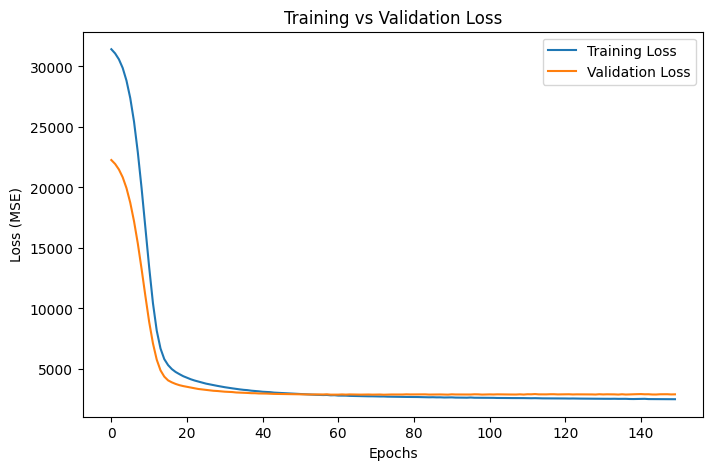

In [104]:
#to plot training loss vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [105]:
#to evaluate the improved model
y_pred_improved = improved_model.predict(X_test)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved Model Performance:")
print("MSE:", mse_improved)
print("R2 Score:", r2_improved)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Improved Model Performance:
MSE: 2750.4491251325026
R2 Score: 0.4808662991008922


In [106]:
#to compare model performance
comparison_df = pd.DataFrame({
    'Model': ['Baseline ANN', 'Improved ANN'],
    'MSE': [mse_baseline, mse_improved],
    'R2 Score': [r2_baseline, r2_improved]
})

comparison_df

,Model,MSE,R2 Score
0,Baseline ANN,4440.547898,0.161868
1,Improved ANN,2750.449125,0.480866


Conclusion:
The improved ANN model performs better than the baseline ANN, as it has a lower Mean Squared Error and a higher R² score. This indicates that the improved model predicts diabetes progression more accurately and explains more variation in the data.